In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
sns.set_style('darkgrid')


In [41]:
df = pd.read_csv('/content/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [42]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [43]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [44]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [45]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
X_val, X_test, y_val, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=42, stratify=y_OTHER)

In [47]:
X_train.shape, X_val.shape, X_test.shape

((64, 3), (8, 3), (9, 3))

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [49]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:],name = 'Input_layer'),
    keras.layers.Dense(64, activation='relu', name = 'Hidden_layer_1'),
    keras.layers.Dense(32, activation='relu', name = 'Hidden_layer_2'),
    keras.layers.Dense(16, activation='relu', name = 'Hidden_layer_3'),
    keras.layers.Dense(1, activation='sigmoid', name = 'Output_layer')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
from keras.optimizers import Adam, SGD

In [68]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    batch_size=4,
                    validation_data=(X_val_scaled, y_val))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9180 - loss: 0.1389 - val_accuracy: 0.8750 - val_loss: 1.2385
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9466 - loss: 0.1111 - val_accuracy: 0.8750 - val_loss: 1.2147
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9893 - loss: 0.0823 - val_accuracy: 0.8750 - val_loss: 1.3276
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 0.7500 - val_loss: 1.5072
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.7500 - val_loss: 1.8353


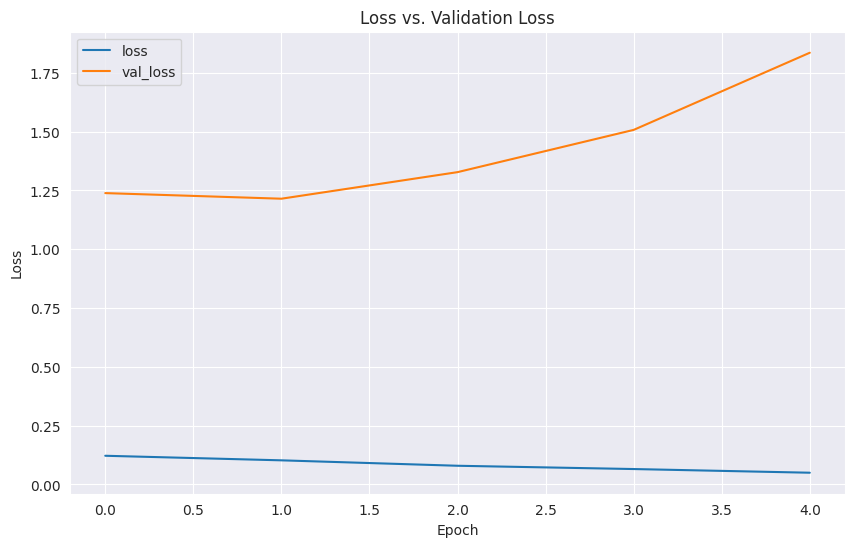

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [77]:
loss,accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8889 - loss: 0.1079
Test Loss: 0.1079
Test Accuracy: 88.8889%


In [78]:
y_prob = model.predict(X_test_scaled)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


array([[0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.62],
       [0.  ]], dtype=float32)

In [79]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
print(f'Test Acc: {accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Test Acc: 77.78%
Confusion Matrix:
[[7 0]
 [2 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
